In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

#### Organização inicial da Base de Dados

In [3]:
#Leitura dos dados csv
df = pd.read_csv("..\db\jena_climate_2009_2016.csv", sep = ',',parse_dates=['Date Time'])

In [4]:
#Renomeando a coluna DateTime para facilitar a manipulação
df.rename(columns={'Date Time':'DateTime'}, inplace=True)

In [5]:
#Definindo DateTime como indice
df_tempo = df.set_index(['DateTime'])
df_tempo.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
DateTime,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [6]:
#Cria a coluna minuto para filtrar o dataframe
df_tempo['minuto'] = pd.to_datetime(df_tempo.index).strftime("%M")
df_tempo.minuto = df_tempo.minuto.astype(int)

In [7]:
#Filtrando o Dataframe para ficar apenas de hora em hora
df_tempo = df_tempo[df_tempo['minuto'] == 00]

In [8]:
#Apagando a coluna minuto
df_tempo.drop(columns='minuto',inplace=True)


In [9]:
#Criando um arquivo csv ja com os dados apenas de hora em hora
df_tempo.to_csv('clima_tratado.csv')

#### Análise exploratória de dados

In [10]:
df = pd.read_csv("..\db\clima_tratado.csv", sep=',')

In [11]:
df.head()

,DateTime,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
1,2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2,2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
3,2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
4,2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70092 entries, 0 to 70091
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DateTime         70092 non-null  object 
 1   p (mbar)         70092 non-null  float64
 2   T (degC)         70092 non-null  float64
 3   Tpot (K)         70092 non-null  float64
 4   Tdew (degC)      70092 non-null  float64
 5   rh (%)           70092 non-null  float64
 6   VPmax (mbar)     70092 non-null  float64
 7   VPact (mbar)     70092 non-null  float64
 8   VPdef (mbar)     70092 non-null  float64
 9   sh (g/kg)        70092 non-null  float64
 10  H2OC (mmol/mol)  70092 non-null  float64
 11  rho (g/m**3)     70092 non-null  float64
 12  wv (m/s)         70092 non-null  float64
 13  max. wv (m/s)    70092 non-null  float64
 14  wd (deg)         70092 non-null  float64
dtypes: float64(14), object(1)
memory usage: 8.0+ MB


>**Comentário:** Analisando todas as colunas, foi observado que não existem valores nulos e, tirando a coluna DateTime, todas as outras são numéricas.

In [13]:
#Setando a coluna DateTime para se tornar o índice
df.set_index(['DateTime'],inplace=True)

In [14]:
#Criação das colunas hora, mes e ano para fazer a análise exploratória dos dados
df = df.assign(
    hora = pd.to_datetime(df.index).strftime('%H').astype(int),
    mes = pd.to_datetime(df.index).strftime('%m').astype(int),
    ano = pd.to_datetime(df.index).strftime('%Y').astype(int)
)

In [15]:
#Excluindo um dado que estava com o ano de 2017
df = df[df.ano<2017]

##### Análise de temperatura ao longo dos meses

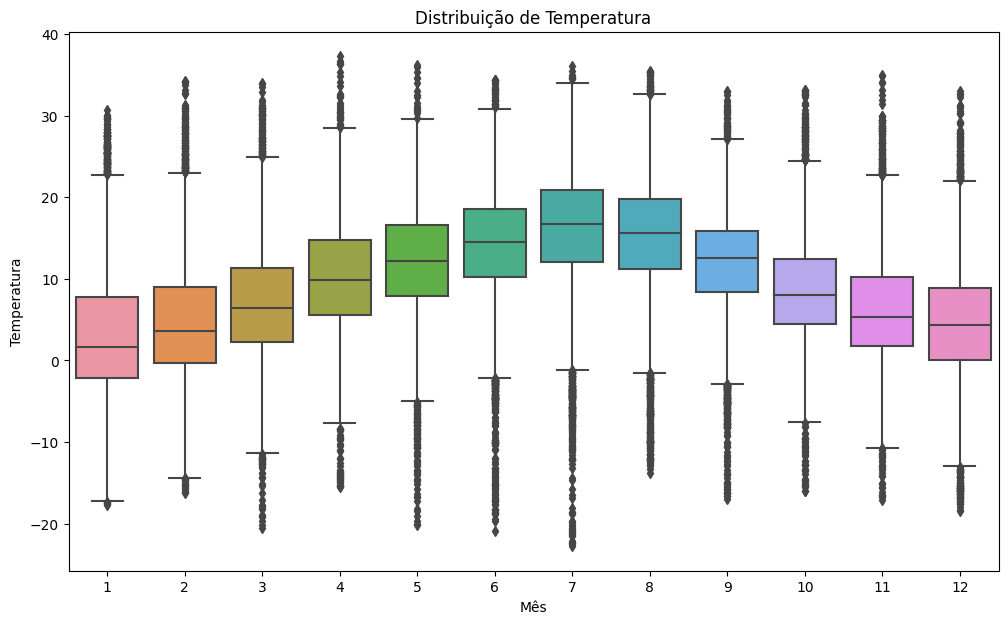

In [16]:
fig, ax = plt.subplots(figsize=(12,7))
sns.boxplot(data=df,y='T (degC)',x='mes',showfliers=True)
plt.ylabel("Temperatura")
plt.xlabel("Mês")
plt.title("Distribuição de Temperatura")
plt.show()

>**Comentário:** Observando o gráfico, podemos notar uma distribuição das temperaturas com um valor mais elevado durante os meses no meio do ano e valores menores de outubro a fevereiro. Outro ponto importante a ser notado é a grande quantidade de outliers apresentado, principalemnte nos meses considerados mais quentes.

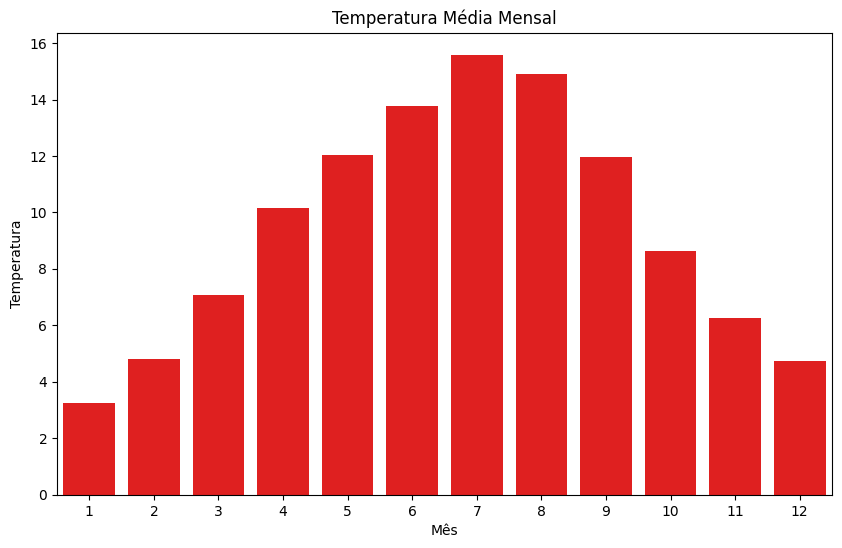

In [17]:
df_media = df.groupby('mes')['T (degC)'].mean().reset_index()
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=df_media, x='mes', y='T (degC)', color="r")
ax.set_title("Temperatura Média Mensal")
ax.set_xlabel("Mês")
ax.set_ylabel("Temperatura")
plt.show()

>**Comentário:** Analisando a temperatura média mensal é possivel confirmar o já especulado no gráfico boxplot, temperaturas mais elevadas no meio do ano e mais baixa no fim e começo do ano. Levando esse ponto em consideração e a geografia do planeta, podemos constatar que esse local está situado no hemisfério norte do planeta.

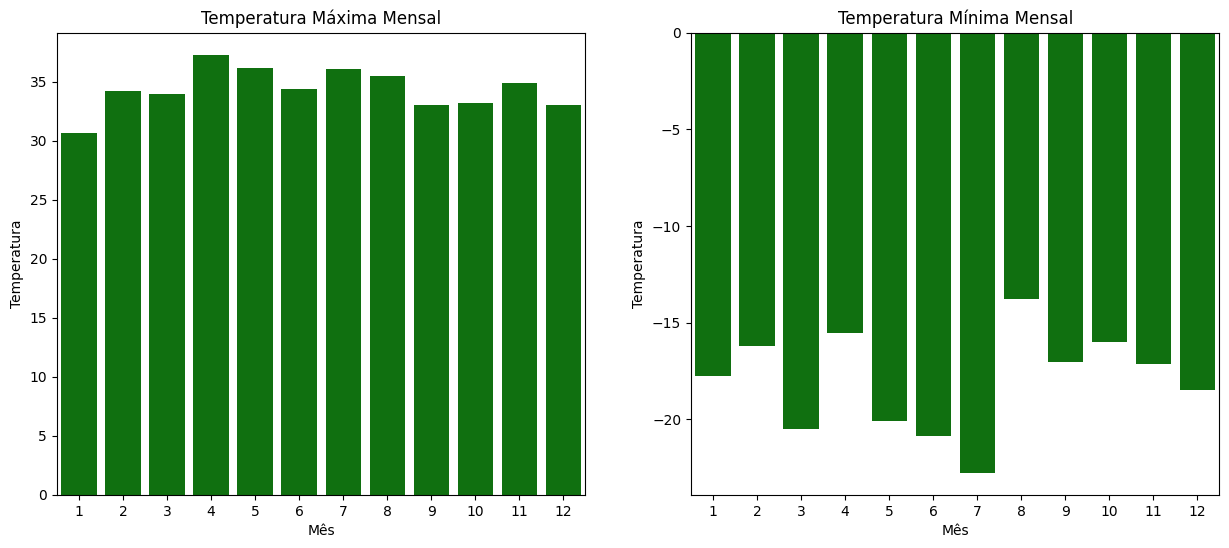

In [18]:
df_max = df.groupby('mes')['T (degC)'].max()
df_min = df.groupby('mes')['T (degC)'].min()

fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.barplot(data=df_max.reset_index(), x='mes', y='T (degC)', ax=ax[0], color="g")
ax[0].set_title("Temperatura Máxima Mensal")
ax[0].set_xlabel("Mês")
ax[0].set_ylabel("Temperatura")
sns.barplot(data=df_min.reset_index(), x='mes', y='T (degC)', ax=ax[1], color="g")
ax[1].set_title("Temperatura Mínima Mensal")
ax[1].set_xlabel("Mês")
ax[1].set_ylabel("Temperatura")
plt.show()

>**Comentário:** Os gráficos de temperaturas máximas e mínimas nos mostra uma grande variância que também podemos perceber no gráfico boxplot apresentado. Em todos os meses tivemos temperaturas máximas acima de 30°C e mínimas abaixo dos 10°C, independente da estação do ano. Isso mostra uma quantidade de outliers que serão analisados, pois podem prejudicar o treinamento do modelo.

##### Análise de temperatura ao longo dos anos

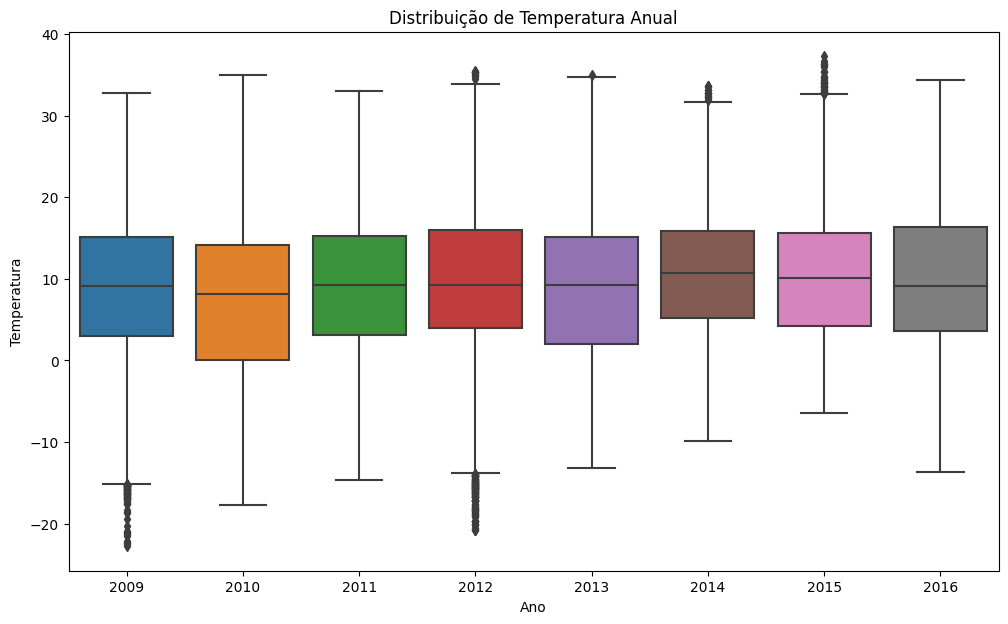

In [19]:
fig, ax = plt.subplots(figsize=(12,7))
sns.boxplot(data=df,y='T (degC)',x='ano',showfliers=True)
plt.ylabel("Temperatura")
plt.xlabel("Ano")
plt.title("Distribuição de Temperatura Anual")
plt.show()

>**Comentário:** A partir do gráfico acima pode concluir que durante os anos de 2009 e 2016 as temperaturas apresentaram níveis parecidos, com baixa variação entre eles. 

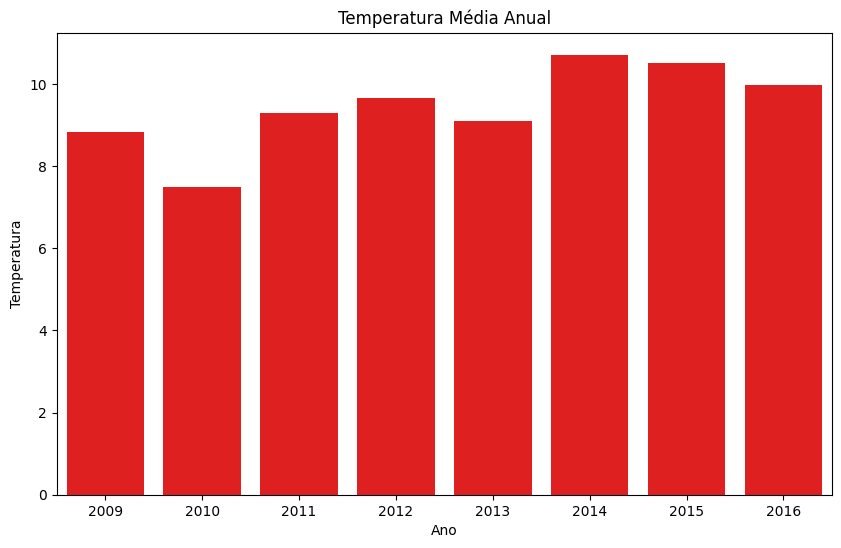

In [20]:
df_media = df.groupby('ano')['T (degC)'].mean().reset_index()
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=df_media, x='ano', y='T (degC)', color="r")
ax.set_title("Temperatura Média Anual")
ax.set_xlabel("Ano")
ax.set_ylabel("Temperatura")
plt.show()

>**Comentário:** É possível notar que a temperatura média ao longo dos anos permaneceram em níveis próximos, com a média mais baixa ocorrendo em 2010 e a mais alta em 2014.

##### Análise das relações entre as variáveis

<AxesSubplot: >

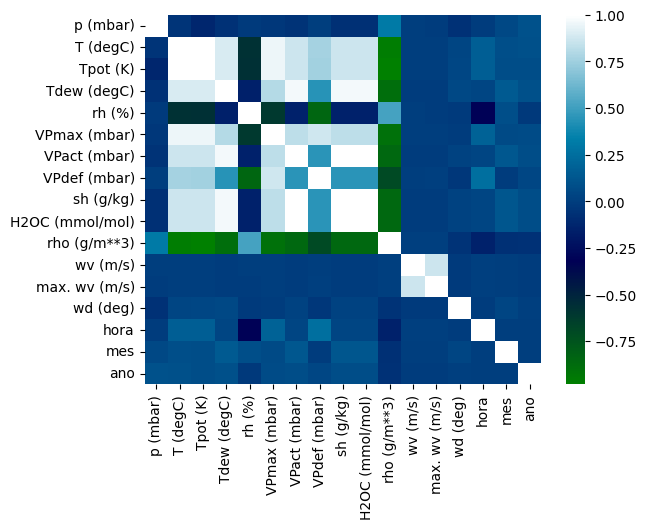

In [21]:
sns.heatmap(df.corr(),cmap='ocean')

In [22]:
df.corr()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),hora,mes,ano
p (mbar),1.000000,-0.045384,-0.124731,-0.066561,-0.018001,-0.031496,-0.054186,-0.003477,-0.069566,-0.069604,0.307661,-0.005697,-0.007273,-0.063992,-0.013206,0.053228,0.094736
T (degC),-0.045384,1.000000,0.996826,0.895724,-0.572146,0.951109,0.867694,0.761673,0.866776,0.867200,-0.963407,-0.004956,-0.003927,0.039646,0.164583,0.083150,0.086927
Tpot (K),-0.124731,0.996826,1.000000,0.894911,-0.566885,0.947284,0.866210,0.756897,0.866538,0.866961,-0.981343,-0.004462,-0.003313,0.044575,0.164555,0.078376,0.078826
Tdew (degC),-0.066561,0.895724,0.894911,1.000000,-0.156332,0.799274,0.968333,0.435689,0.967589,0.968035,-0.885192,-0.008619,-0.009748,0.050503,0.036226,0.142189,0.093551
rh (%),-0.018001,-0.572146,-0.566885,-0.156332,1.000000,-0.615612,-0.151250,-0.843712,-0.150597,-0.150730,0.514106,-0.004229,-0.008648,-0.017279,-0.309464,0.081857,-0.024736
VPmax (mbar),-0.031496,0.951109,0.947284,0.799274,-0.615612,1.000000,0.824872,0.875544,0.824464,0.824500,-0.901516,-0.004391,-0.003192,-0.009679,0.180201,0.062017,0.068719
VPact (mbar),-0.054186,0.867694,0.866210,0.968333,-0.151250,0.824872,1.000000,0.449084,0.999851,0.999856,-0.850210,-0.009423,-0.010939,0.019135,0.036834,0.125927,0.077613
VPdef (mbar),-0.003477,0.761673,0.756897,0.435689,-0.843712,0.875544,0.449084,1.000000,0.448566,0.448619,-0.698235,0.001118,0.004307,-0.031648,0.253330,-0.009601,0.042286
sh (g/kg),-0.069566,0.866776,0.866538,0.967589,-0.150597,0.824464,0.999851,0.448566,1.000000,0.999997,-0.853292,-0.009304,-0.010794,0.020126,0.037092,0.124810,0.075916
H2OC (mmol/mol),-0.069604,0.867200,0.866961,0.968035,-0.150730,0.824500,0.999856,0.448619,0.999997,1.000000,-0.853738,-0.009307,-0.010795,0.020361,0.037079,0.124992,0.075977


>**Comentário:** Analisando o gráfico e a tabela de correlção, nota-se que a temperatura tem relações fortes tanto diretamente como inversamente proporcional a algumas variáveis.

In [23]:
df = df.drop(columns=['hora','mes','ano'])

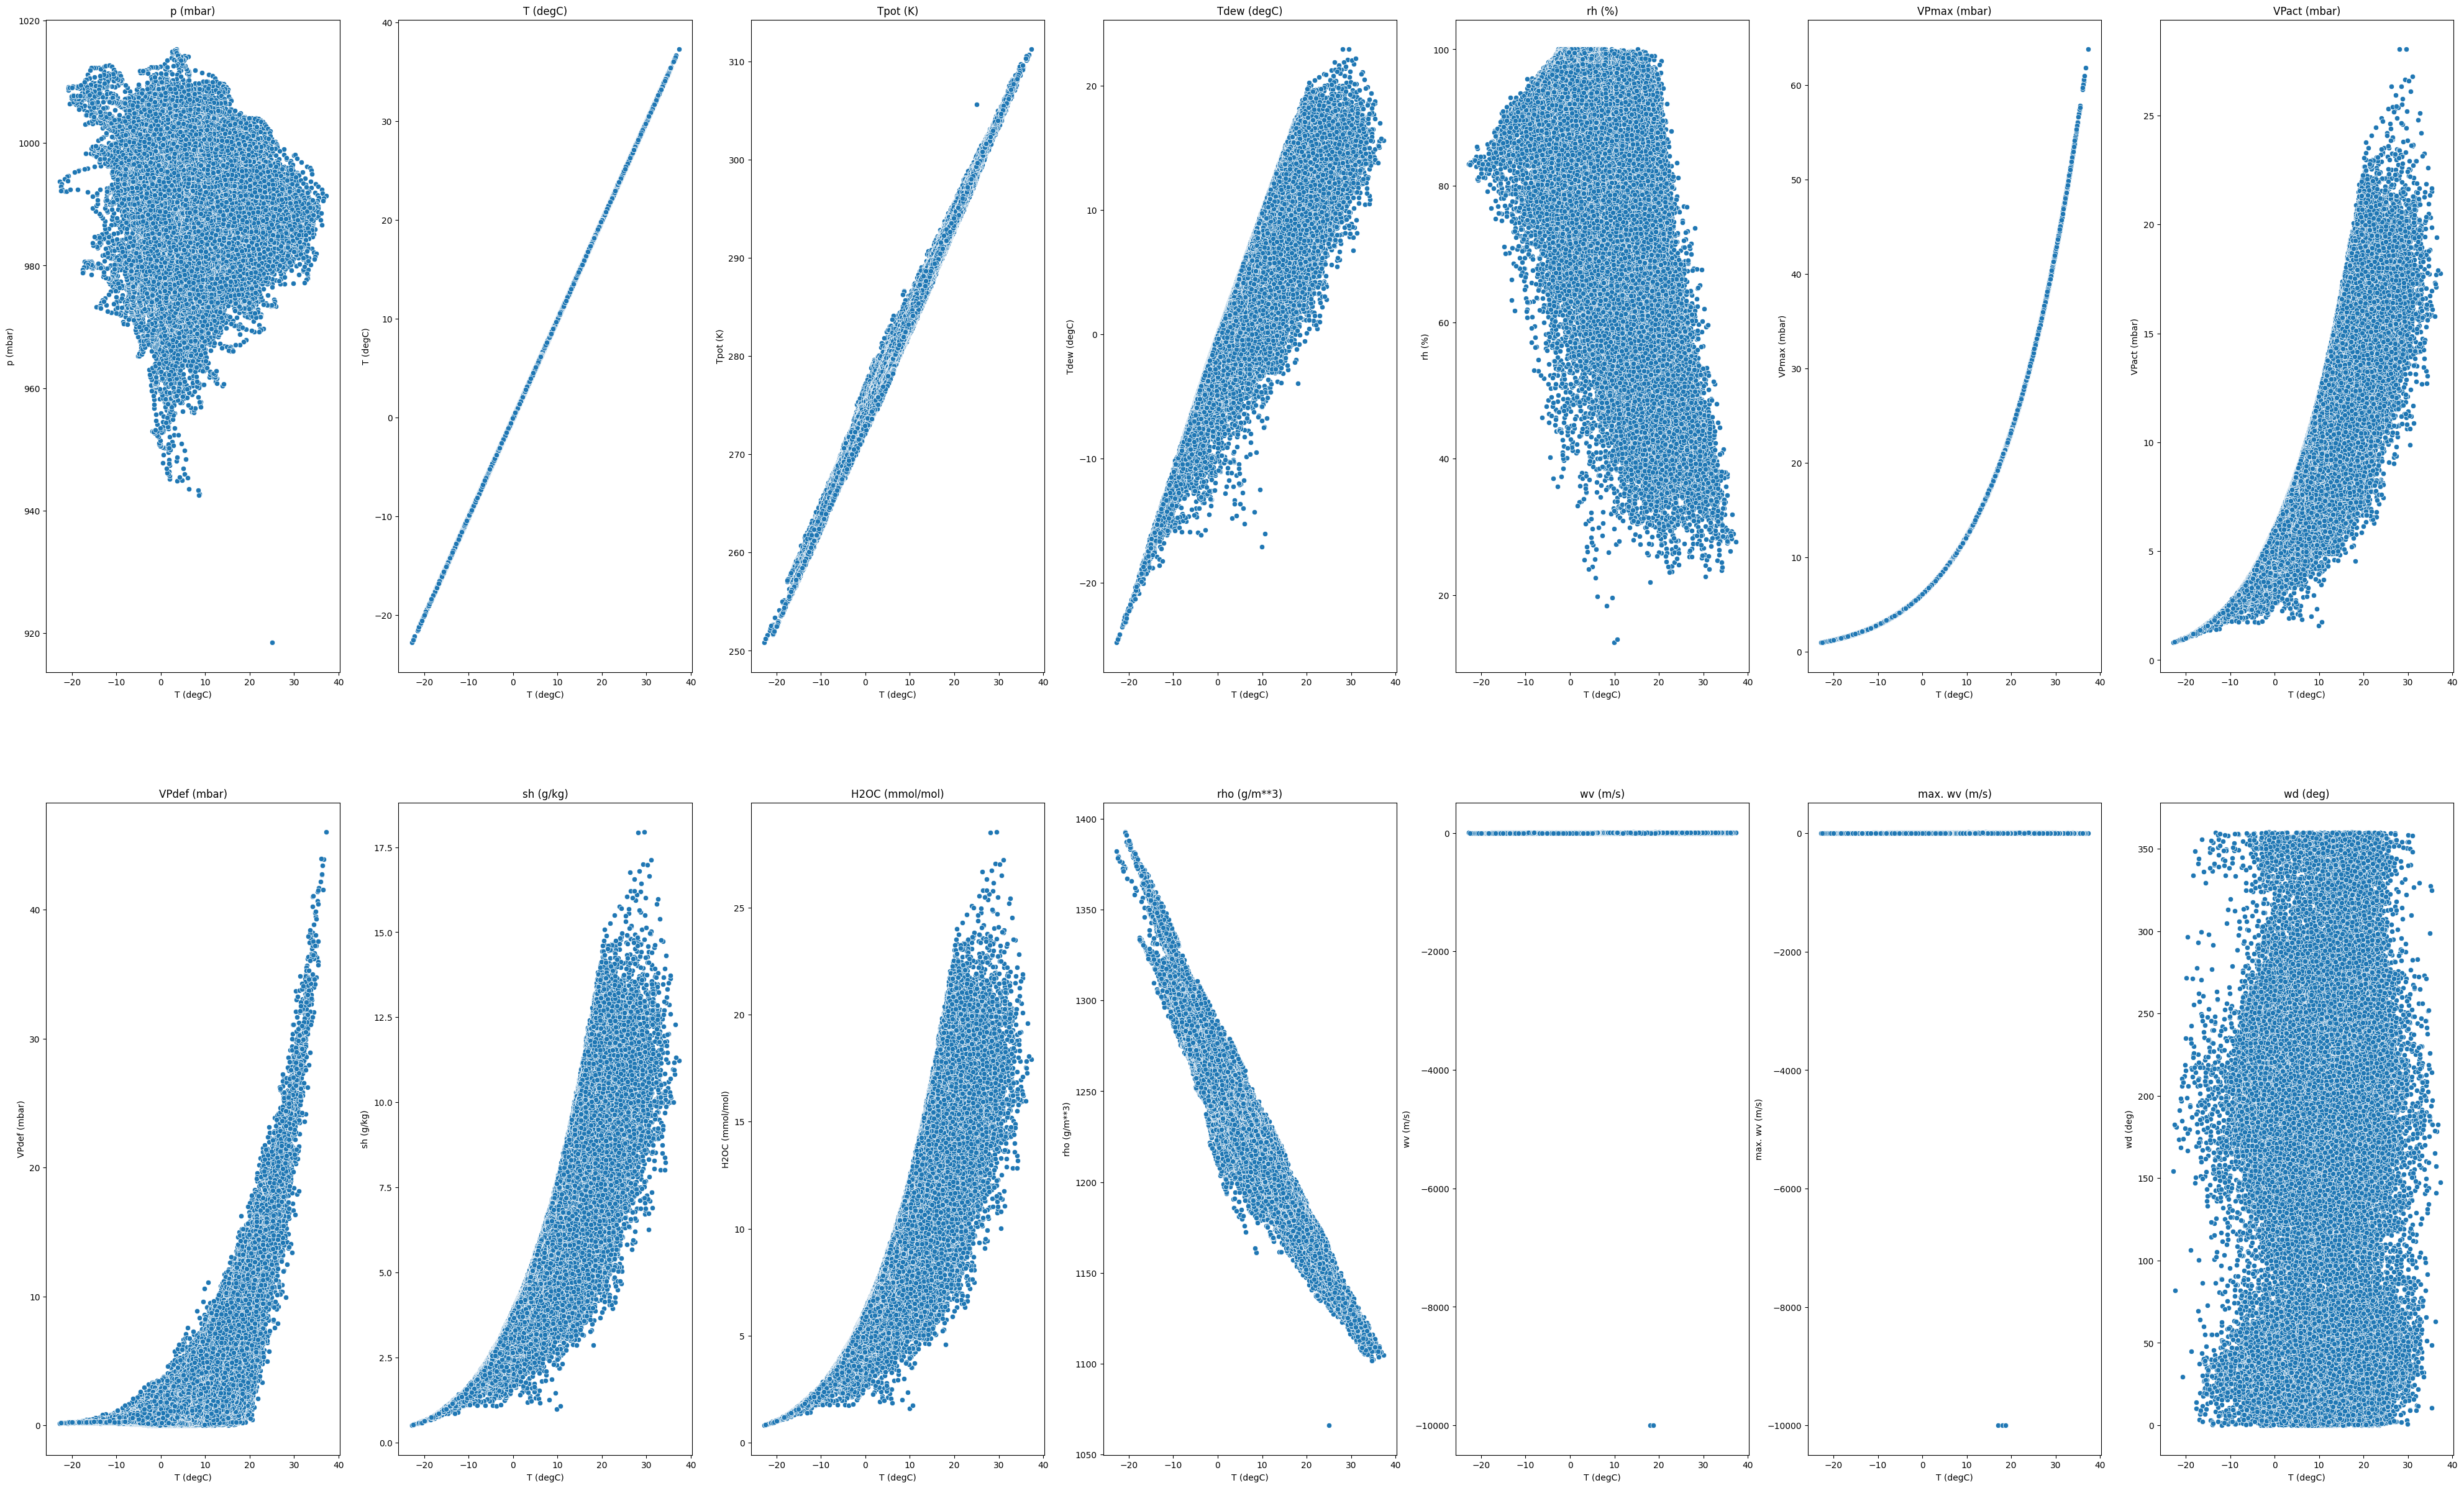

In [30]:
# Define o número de subplots
n = 14

# Cria uma figura e um array de eixos
fig, axs = plt.subplots(2, (n+1)//2, figsize=(50,30))

# Laço para adicionar subplots
for i, col in enumerate(df):
    # Cria um gráfico de linha
    sns.scatterplot(ax = axs.ravel()[i],data= df, x= 'T (degC)',y=df[col])
    axs.ravel()[i].set_title(col)

# Exibe a figura
plt.show()

>**Comentário:** Como mencionado anteriormente, a temperatura apresenta relações fortes e diretamente proporcionais, como com a variável Tdew(Linear), e as variáveis VPmax,sh e H20C(Exponencial), fortes e inversamente proporcionais, como a relação com rho(Linear) e baixa relação, com com a variável p(mbar).

##### Análise de Outliers

>**Observações:** Como notado anteriormente, existe uma forte presença de outliers que fazem com que a temperatura dentro de um mês varie de -30°C a 20°C em uma determinada estação, como inverno ou verão. Será feita então uma verificação desses outliers para fazer a retirada ou não dos mesmos.

In [26]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000
mean,989.212874,9.449707,283.492303,4.955688,76.008225,13.575516,9.533657,4.041773,6.022357,9.640126,1216.064509,1.702906,2.963096,174.929674
std,8.358121,8.422433,8.503530,6.730847,16.473882,7.738425,4.184312,4.896232,2.656248,4.235538,39.971144,65.447448,75.597501,86.613489
min,918.500000,-22.760000,250.850000,-24.800000,13.060000,0.970000,0.810000,0.000000,0.510000,0.810000,1066.190000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.350000,277.430000,0.240000,65.250000,7.770000,6.210000,0.870000,3.920000,6.290000,1187.520000,0.990000,1.760000,125.500000
50%,989.580000,9.420000,283.470000,5.210000,79.300000,11.820000,8.860000,2.180000,5.590000,8.960000,1213.820000,1.760000,2.960000,198.400000
75%,994.720000,15.470000,289.520000,10.070000,89.400000,17.600000,12.355000,5.300000,7.800000,12.480000,1242.810000,2.860000,4.740000,234.200000
max,1015.290000,37.280000,311.210000,22.940000,100.000000,63.770000,28.040000,46.010000,17.940000,28.530000,1392.560000,12.580000,20.330000,360.000000


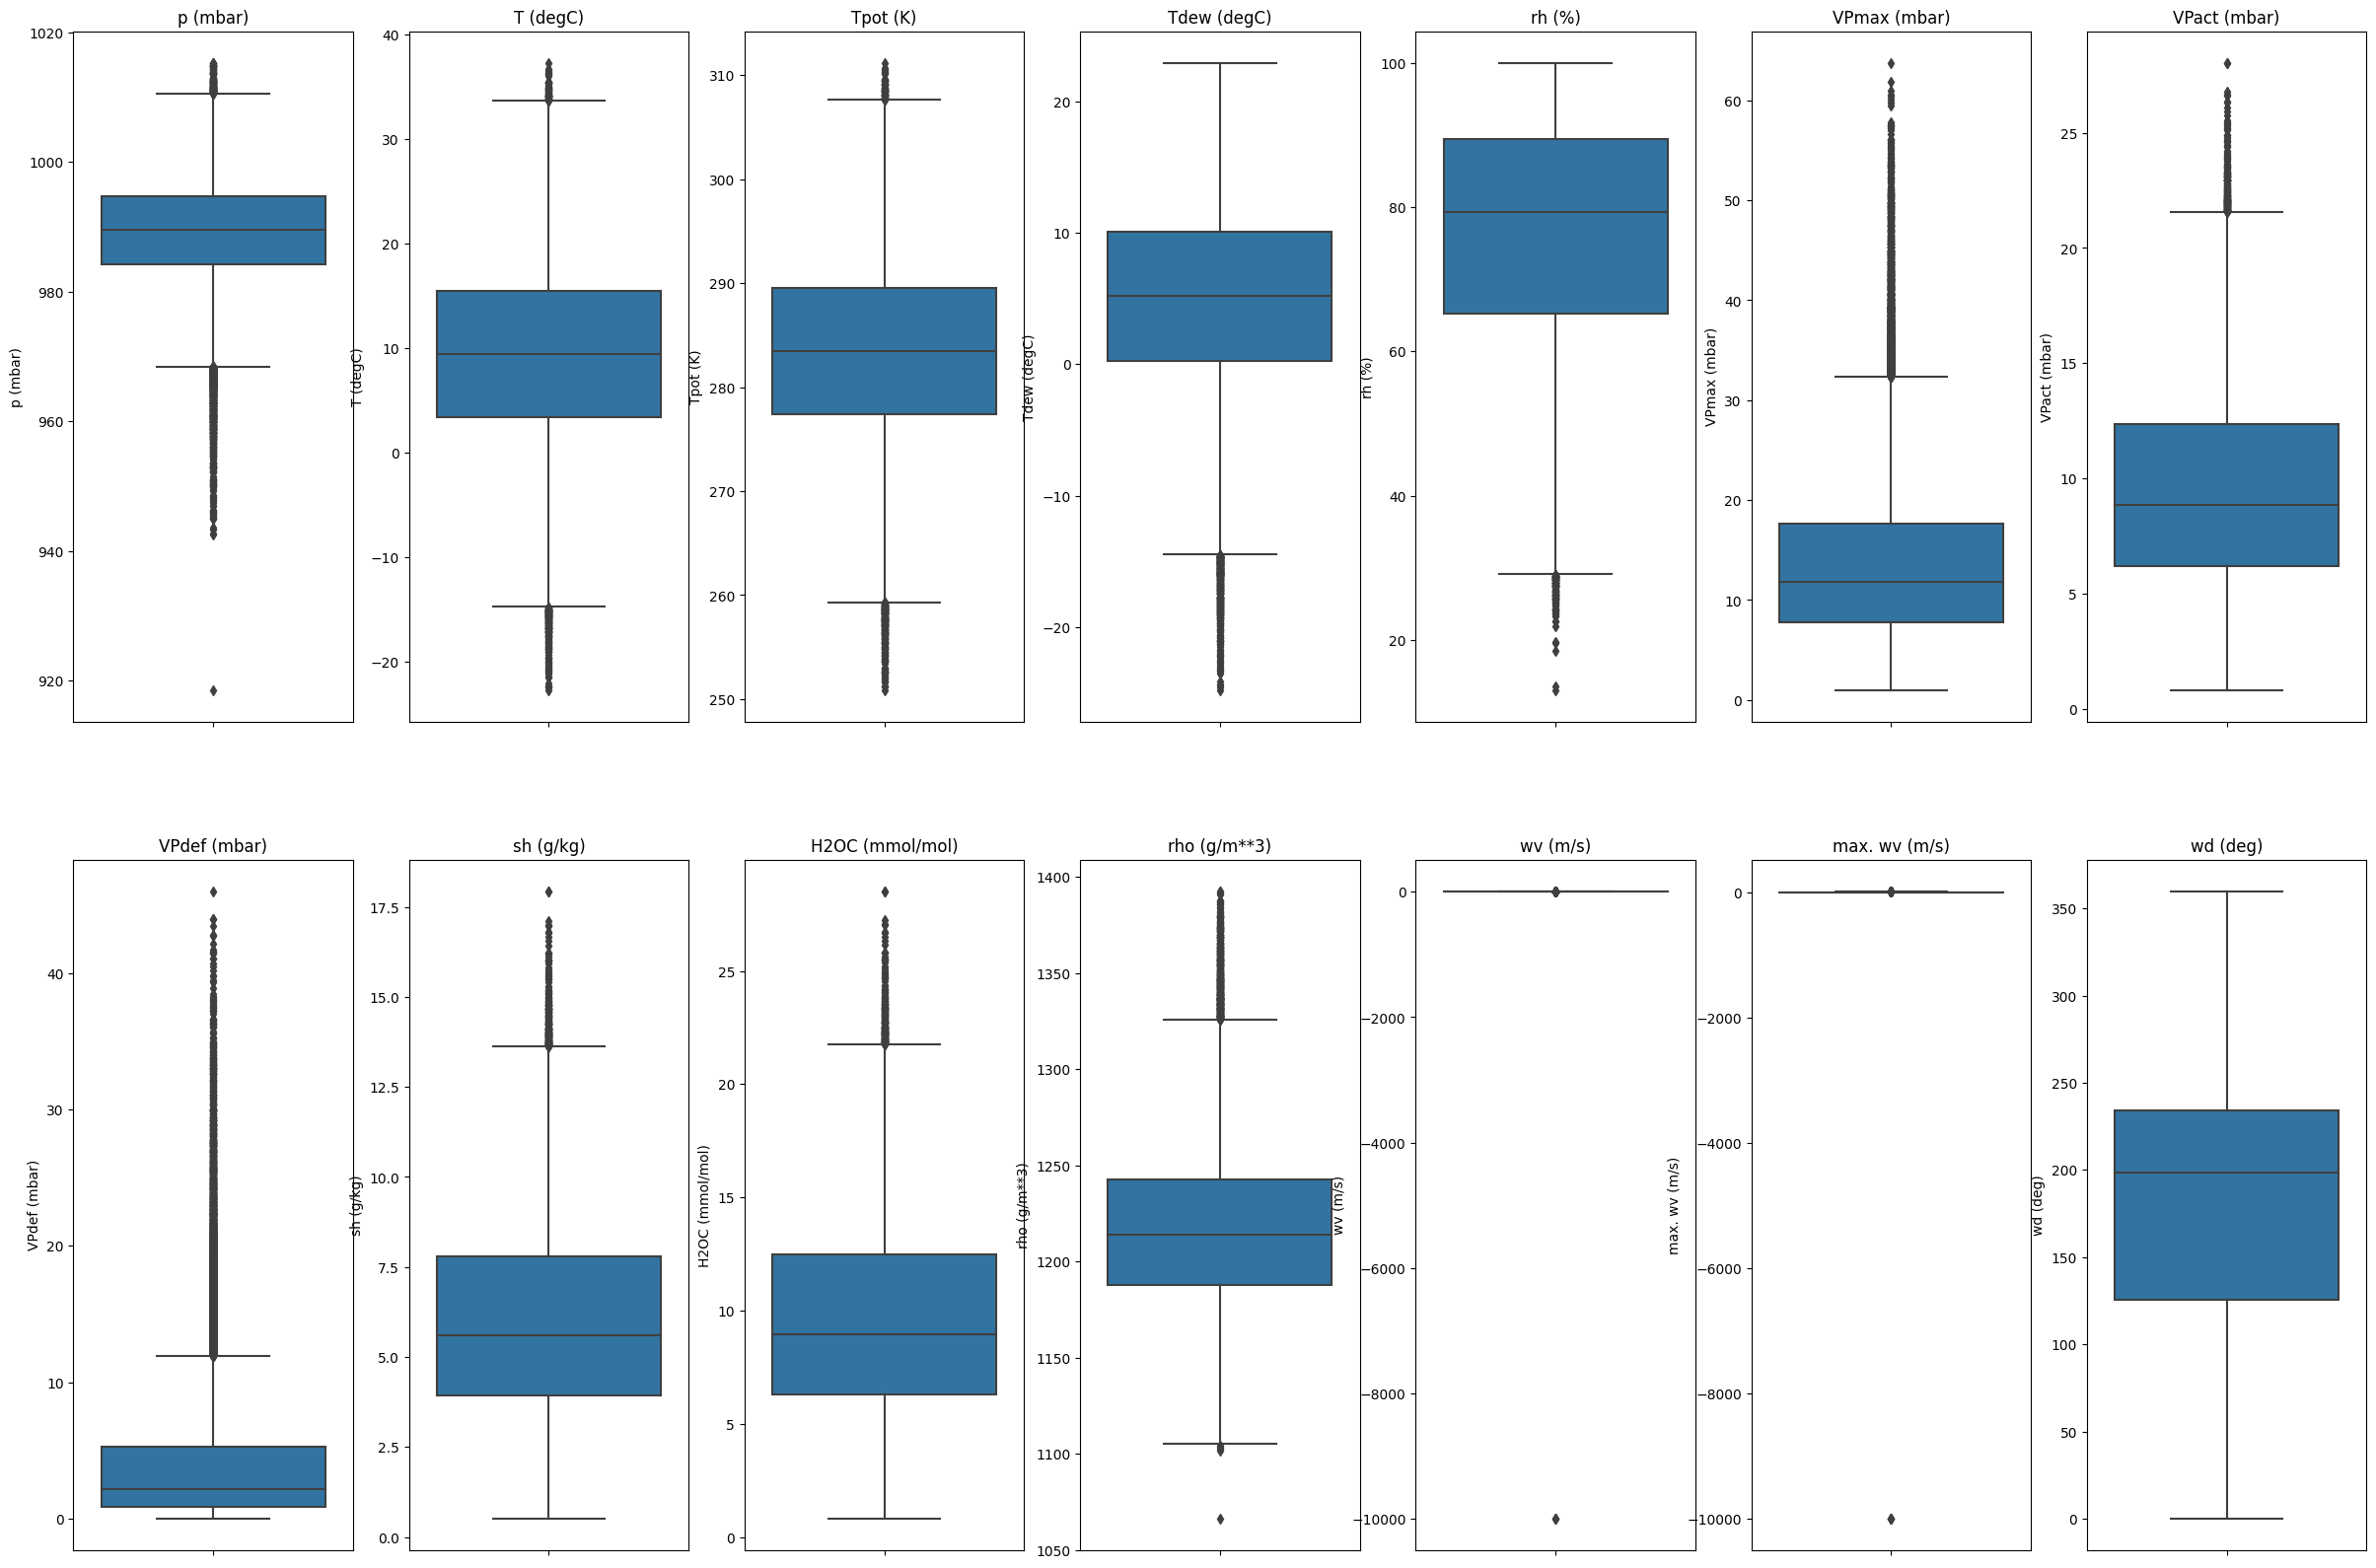

In [27]:
# Define o número de subplots
n = 14

# Cria uma figura e um array de eixos
fig, axs = plt.subplots(2, (n+1)//2, figsize=(30,20))

# Laço para adicionar subplots
for i, col in enumerate(df):
    # Cria um gráfico de linha
    sns.boxplot(ax = axs.ravel()[i],data= df, y=df[col])
    axs.ravel()[i].set_title(col)

# Exibe a figura
plt.show()

In [28]:
df[df['wv (m/s)']<-9000]

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
DateTime,,,,,,,,,,,,,,
2015-07-13 10:00:00,990.20,17.98,291.96,12.74,71.40,20.65,14.74,5.90,9.31,14.89,1178.14,-9999.0,-9999.0,359.8
2015-07-13 11:00:00,990.16,18.71,292.70,12.48,67.07,21.61,14.50,7.12,9.16,14.64,1175.26,-9999.0,-9999.0,359.8
2015-07-13 12:00:00,990.15,18.75,292.74,12.27,65.97,21.67,14.29,7.37,9.03,14.44,1175.18,-9999.0,-9999.0,359.8


>**Comentário:** Foram detectados outliers em quase todas as variáveis. Apesar disso, será analisado no momento de treinamento e teste com a presença e ausência de outliers e verificar a influência no modelo.